### Distribution Clinical Features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/notebooks/disk2/CSV_Dataset/Clinical_Features.csv')
ds = pd.read_csv ('/notebooks/disk2/CSV_Dataset/D-Cohort-Brain.csv')
common_column = "Patient ID"
df_1 = set(df[common_column])
ds_1 = set(ds[common_column])

df_ds = df_1 & ds_1
df_combined = pd.merge(df, ds, on=common_column, how="inner")
df_combined.to_csv('/notebooks/disk2/CSV_Dataset/Extra_Distribution_Clinical_Features.csv', index=False)

Remaining Patient IDs: ['Patient_01' 'Patient_07' 'Patient_08' 'Patient_09' 'Patient_10'
 'Patient_11' 'Patient_12' 'Patient_14' 'Patient_17' 'Patient_19'
 'Patient_25' 'Patient_26' 'Patient_27' 'Patient_28' 'Patient_29'
 'Patient_33' 'Patient_34' 'Patient_35' 'Patient_37' 'Patient_38'
 'Patient_43' 'Patient_44' 'Patient_45' 'Patient_46' 'Patient_47'
 'Patient_49' 'Patient_54' 'Patient_62' 'Patient_63' 'Patient_65'
 'Patient_67' 'Patient_68' 'Patient_69' 'Patient_71' 'Patient_72'
 'Patient_73' 'Patient_74' 'Patient_75' 'Patient_76' 'Patient_77'
 'Patient_78' 'Patient_82' 'Patient_83' 'Patient_84' 'Patient_85'
 'Patient_87' 'Patient_88' 'Patient_89' 'Patient_90' 'Patient_91'
 'Patient_94' 'Patient_95' 'Patient_96']


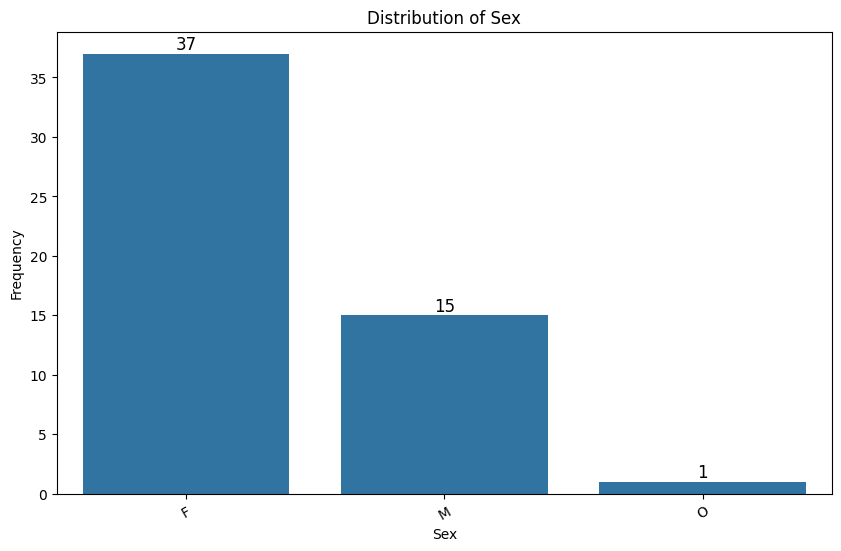

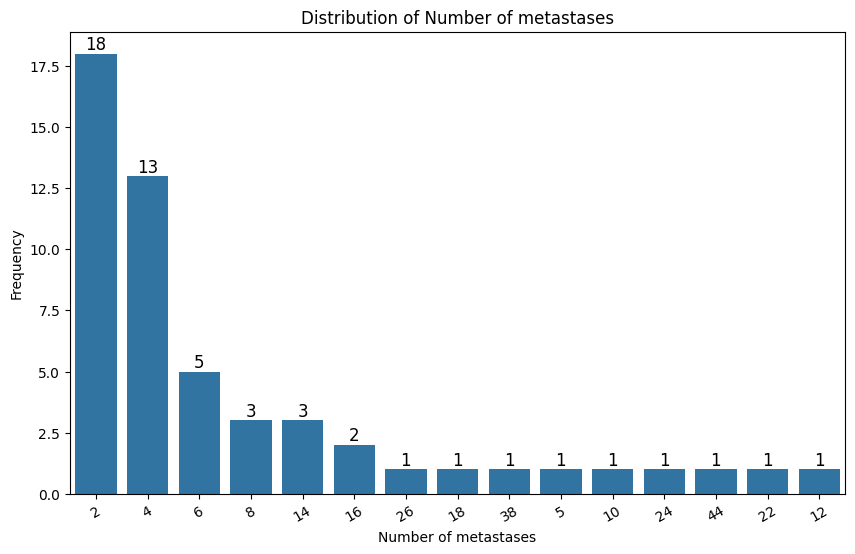

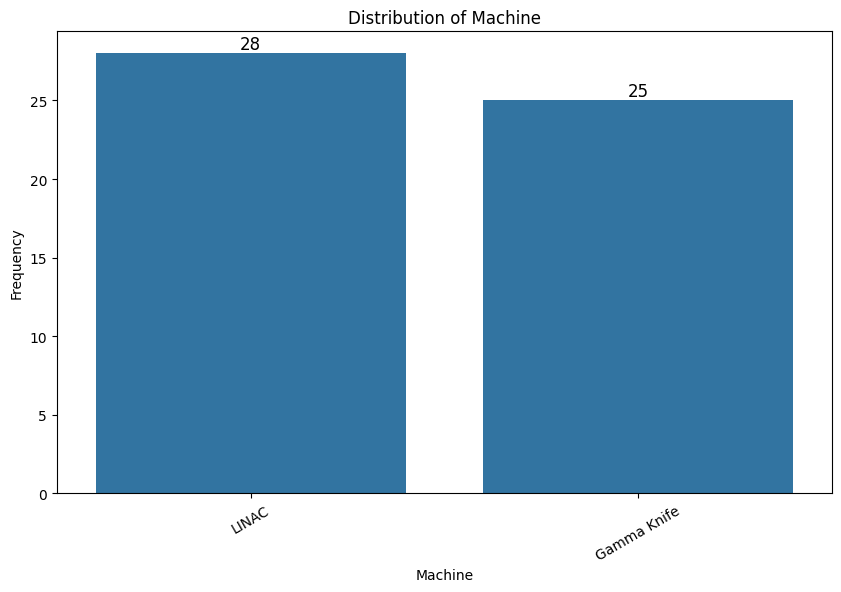

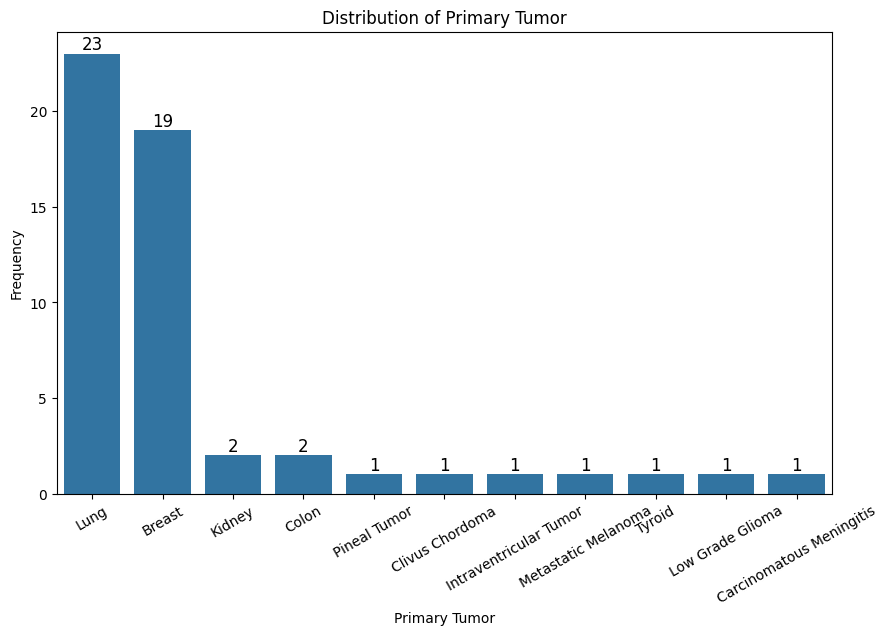

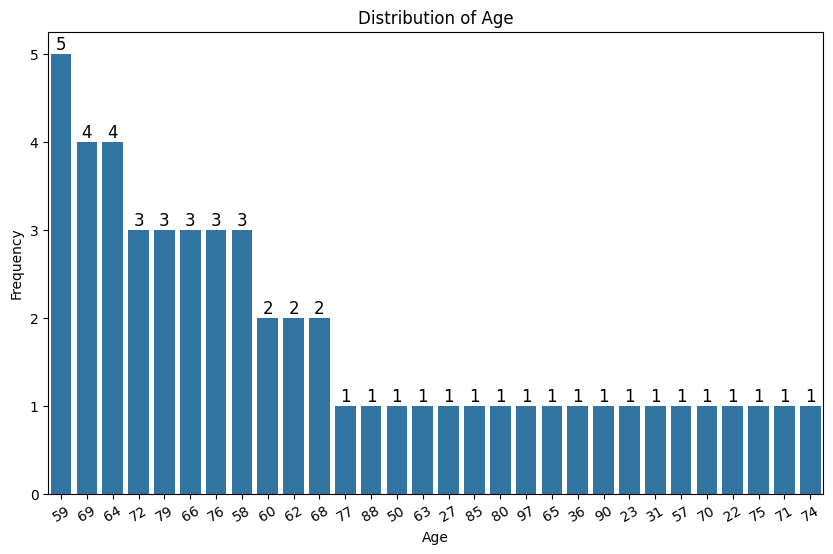

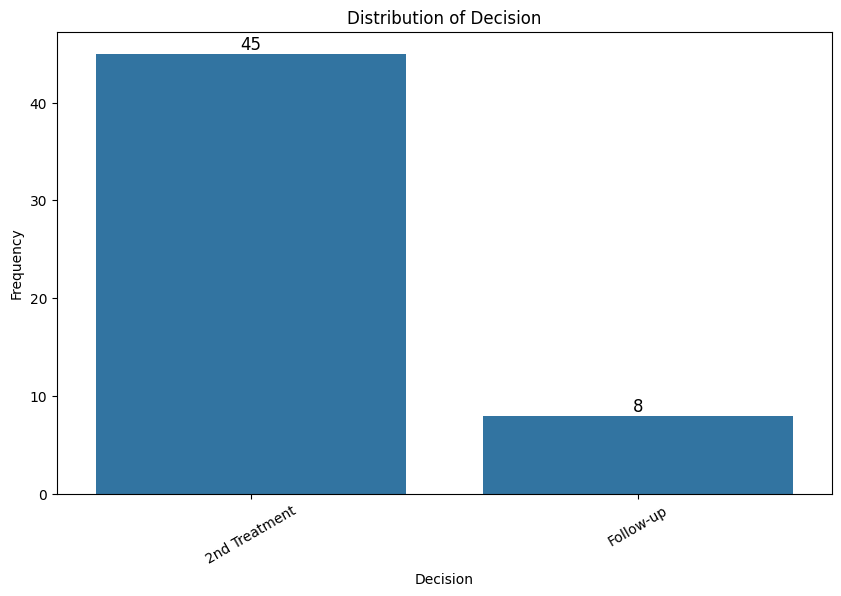

In [4]:
df = pd.read_csv("/notebooks/disk2/CSV_Dataset/Clinical_Features_Final_Final.csv")

# Optional: check remaining Patient IDs
print("Remaining Patient IDs:", df['Patient ID'].unique())

columns = df.columns

for column in columns:
    if column != 'Patient ID' and column != 'First Treatment' and column != 'First Follow-Up':
        plt.figure(figsize=(10,6))
        ax = sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=30)
        plt.ylabel("Frequency")

        # Add counts on top of bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=12, color='black')

        plt.show()

First Treatment -> 53 ok / 0 NaT
First Follow-Up  -> 53 ok / 0 NaT
[]


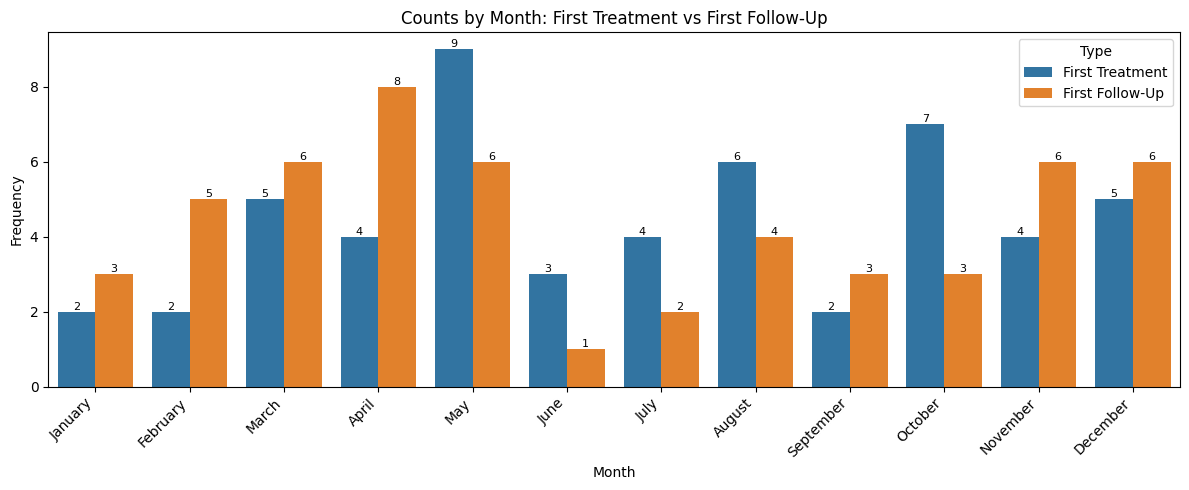

In [7]:
df = pd.read_csv("/notebooks/disk2/CSV_Dataset/Clinical_Features_Final_Final.csv", dtype=str)
df.columns = df.columns.str.strip()
def clean_to_dt(s):
    s = s.astype(str).str.strip()
    s = s.replace({'': pd.NA, 'nan': pd.NA, 'NaN': pd.NA})
    # normaliza traços e remove lixo comum
    s = (s.str.replace(r'[–—−]', '-', regex=True)
           .str.replace(r'\s+', ' ', regex=True)
           .str.replace(r'\.0$', '', regex=True))
    # tenta formato principal AAAA-MM-DD; se falhar, tenta inferir
    dt = pd.to_datetime(s, format="%Y-%m-%d", errors="coerce")
    mask = dt.isna()
    if mask.any():
        dt2 = pd.to_datetime(s[mask], errors="coerce")  # inferência
        dt = dt.fillna(dt2)
    return dt

df["First Treatment_dt"]  = clean_to_dt(df["First Treatment"])
df["First Follow-Up_dt"] = clean_to_dt(df["First Follow-Up"])

print("First Treatment ->", df["First Treatment_dt"].notna().sum(), "ok /",
      df["First Treatment_dt"].isna().sum(), "NaT")
print("First Follow-Up  ->", df["First Follow-Up_dt"].notna().sum(), "ok /",
      df["First Follow-Up_dt"].isna().sum(), "NaT")

# Se ainda houver NaT, vê alguns exemplos "crus"
print(df.loc[df["First Treatment_dt"].isna(), "First Treatment"].head(8).tolist())
import seaborn as sns, matplotlib.pyplot as plt, calendar

def month_counts(dt_col, label):
    m = dt_col.dropna().dt.month
    return pd.DataFrame({"Month": range(1,13),
                         label: m.value_counts().reindex(range(1,13), fill_value=0).values})

ct1 = month_counts(df["First Treatment_dt"], "First Treatment")
ct2 = month_counts(df["First Follow-Up_dt"], "First Follow-Up")



plot_df = ct1.merge(ct2, on="Month").melt(id_vars="Month", var_name="Type", value_name="Count")
plot_df["MonthName"] = pd.Categorical(
    [calendar.month_name[m] for m in plot_df["Month"]],
    categories=[calendar.month_name[m] for m in range(1,13)],
    ordered=True
)

plt.figure(figsize=(12,5))
ax = sns.barplot(data=plot_df, x="MonthName", y="Count", hue="Type")
for cont in ax.containers:
    ax.bar_label(cont, fmt="%d", fontsize=8)
plt.title("Counts by Month: First Treatment vs First Follow-Up")
plt.xlabel("Month"); plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()


In [32]:
df["First Treatment_dt"]  = pd.to_datetime(df["First Treatment"],  format="%Y-%m-%d", errors="coerce")
df["First Follow-Up_dt"] = pd.to_datetime(df["First Follow-Up"], format="%Y-%m-%d", errors="coerce")

print("First Treatment_dt ->", df["First Treatment_dt"].notna().sum(), "ok /",
      df["First Treatment_dt"].isna().sum(), "NaT")
print("First Follow-Up_dt ->", df["First Follow-Up_dt"].notna().sum(), "ok /",
      df["First Follow-Up_dt"].isna().sum(), "NaT")

df["Months_Between"] = (
    (df["First Follow-Up_dt"] - df["First Treatment_dt"]) / pd.Timedelta(days=30)
).round(1)

df["Days_Between"] = (
    df["First Follow-Up_dt"] - df["First Treatment_dt"]
).dt.days

# 3) Verificar rapidamente
print(df[["First Treatment_dt", "First Follow-Up_dt", "Months_Between", "Days_Between"]].head(50))

def clean_to_dt(s):
    s = s.astype(str).str.strip()
    s = s.replace({'': pd.NA, 'nan': pd.NA, 'NaN': pd.NA})
    s = (s.str.replace(r'[–—−]', '-', regex=True)  
         .str.replace(r'\s+', ' ', regex=True)
         .str.replace(r'\.0$', '', regex=True))
    dt = pd.to_datetime(s, format="%Y-%m-%d", errors="coerce")
    mask = dt.isna()
    if mask.any():
        dt2 = pd.to_datetime(s[mask], errors="coerce")  
        dt = dt.fillna(dt2)
    return dt

df["First Treatment_dt"]  = clean_to_dt(df["First Treatment"])
df["First Follow-Up_dt"] = clean_to_dt(df["First Follow-Up"])

negatives = df[df["Months_Between"] < 0][["Patient ID","First Treatment_dt","First Follow-Up_dt","Months_Between"]]
print("Casos negativos:", len(negatives))
print(negatives)


First Treatment_dt -> 53 ok / 0 NaT
First Follow-Up_dt -> 53 ok / 0 NaT
   First Treatment_dt First Follow-Up_dt  Months_Between  Days_Between
0          2023-04-01         2023-12-01             8.1           244
1          2015-10-01         2017-03-01            17.2           517
2          2018-05-01         2018-11-01             6.1           184
3          2018-08-01         2019-04-01             8.1           243
4          2018-01-01         2018-11-01            10.1           304
5          2017-08-01         2023-05-01            70.0          2099
6          2018-04-01         2020-03-01            23.3           700
7          2014-08-01         2017-01-01            29.5           884
8          2020-10-01         2021-10-01            12.2           365
9          2019-06-01         2020-02-01             8.2           245
10         2019-05-01         2020-01-01             8.2           245
11         2029-05-01         2021-04-01           -98.4         -2952
12   

In [34]:
negatives = df[df["Months_Between"] < 0]

for idx, row in negatives.iterrows():
    pid = row.get("Patient ID", idx)
    t_old = row["First Treatment_dt"]
    f_old = row["First Follow-Up_dt"]
    
    print(f"Patient: {pid}")
    print(f"Current Treatment : {t_old}")
    print(f"Current Follow-Up : {f_old}")
    print(f"Months_Between: {row['Months_Between']} (negative)")

    swap = input("Swap the dates? (s/N): ").strip().lower()
    if swap == "s":
        df.at[idx, "First Treatment_dt"] = f_old
        df.at[idx, "First Follow-Up_dt"] = t_old
        print("Dates inverted (Treatment <-> Follow-Up).")
    else:
        t_in = input("New Treatment date (AAAA-MM-DD) [ENTER to keep]: ")
        f_in = input("New Follow-Up date (AAAA-MM-DD) [ENTER to keep]: ")
        new_t_dt = parse_date_or_none(t_in)
        new_f_dt = parse_date_or_none(f_in)

        if new_t_dt is not None:
            df.at[idx, "First Treatment_dt"] = new_t_dt
        if new_f_dt is not None:
            df.at[idx, "First Follow-Up_dt"] = new_f_dt

    t_new = df.at[idx, "First Treatment_dt"]
    f_new = df.at[idx, "First Follow-Up_dt"]
    df.at[idx, "Months_Between"] = round((f_new - t_new) / pd.Timedelta(days=30), 1)
    df.at[idx, "Days_Between"] = (f_new - t_new).days

    print(f"Updated: Treatment={t_new}, Follow-Up={f_new}, Months={df.at[idx, 'Months_Between']}")

path_out = "/notebooks/disk2/CSV_Dataset/Clinical_Features_Final_Final_corrected.csv"
df.to_csv(path_out, index=False)
print(f"File updated saved: {path_out}")

Patient: Patient_26
Current Treatment : 2019-05-01 00:00:00
Current Follow-Up : 2021-04-01 00:00:00
Months_Between: -98.4 (negative)


Swap the dates? (s/N):  n
New Treatment date (AAAA-MM-DD) [ENTER to keep]:  2019-05-01
New Follow-Up date (AAAA-MM-DD) [ENTER to keep]:  2021-04-01


Updated: Treatment=2019-05-01 00:00:00, Follow-Up=2021-04-01 00:00:00, Months=23.4
File updated saved: /notebooks/disk2/CSV_Dataset/Clinical_Features_Final_Final_corrected.csv


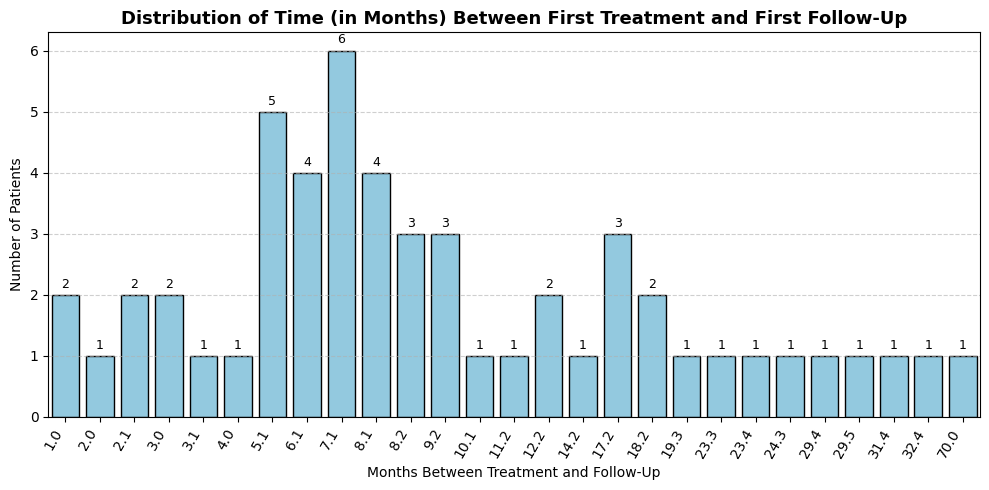

In [35]:
df_positive = df[df["Months_Between"] > 0]

plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df_positive,
    x="Months_Between",
    color="skyblue",
    edgecolor="black"
)

# Adiciona contagens em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=9, label_type="edge", padding=3)

plt.xticks(rotation=60, ha='right')
plt.title("Distribution of Time (in Months) Between First Treatment and First Follow-Up", fontsize=13, weight='bold')
plt.xlabel("Months Between Treatment and Follow-Up")
plt.ylabel("Number of Patients")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
